## Importing Modules 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pylab as rcParams
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from statsmodels.formula.api import ols
from statsmodels.tools import add_constant
from pandas.core import datetools

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### First time series creation

In [2]:
# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

In [3]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Creating time series of air quality data

In [6]:
data = pd.read_csv("air_quality_data/nyc.csv")

In [7]:
# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


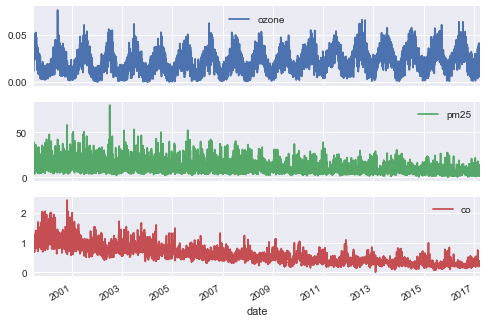

In [8]:
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

### Campare annual stock price trends

In [14]:
yahoo = pd.read_csv("stock_data/yahoo.csv")

In [19]:
yahoo = yahoo.set_index(pd.DatetimeIndex(yahoo['date']))

In [20]:
yahoo.head()

,date,price
date,,
2013-01-02,2013-01-02,20.08
2013-01-03,2013-01-03,19.78
2013-01-04,2013-01-04,19.86
2013-01-07,2013-01-07,19.40
2013-01-08,2013-01-08,19.66


In [21]:
# Create dataframe prices here
prices = pd.DataFrame()

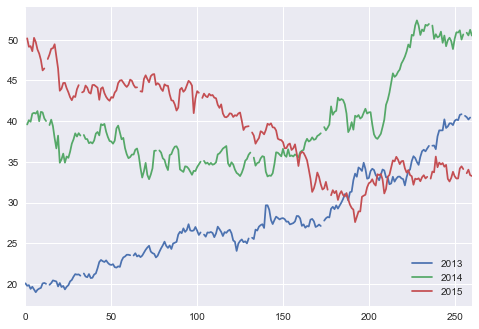

In [22]:
# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency

Using data on the daily carbon monoxide concentration to monthly frquency and visualize both series to see how the diffrent frequnceies affect the data

In [69]:
co = pd.read_csv("air_quality_data/co_cities.csv")

In [70]:
co = co.set_index(pd.DatetimeIndex(co['date']))

In [73]:
del co['date']

In [74]:
co.head(10)

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
2005-01-07,0.625000,0.584556,0.735915
2005-01-08,0.608334,0.173052,0.815625
2005-01-09,0.397917,0.115987,0.619081
2005-01-10,0.577083,0.157382,0.668750


In [75]:
# Inspect data
print(co.info())

# Set data # set the frequency to calendar daily
co = co.asfreq('D')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


In [76]:
co=co.astype(float)

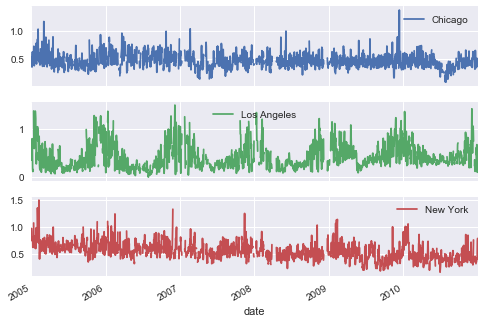

In [77]:
# Plot the data
co.plot(subplots=True)
plt.show()

In [78]:
# Set frequency to monthly
co = co.asfreq('M')

In [79]:
co=co.astype(float)

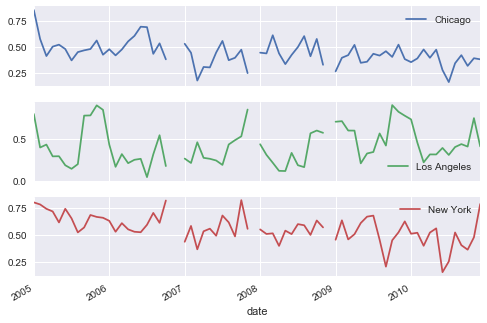

In [80]:
# Plot the 'close' price
co.plot(subplots=True)
plt.show()

### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

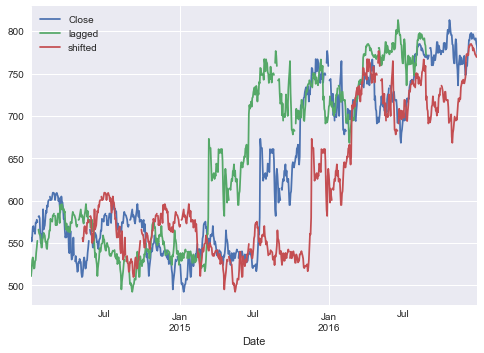

In [81]:
# Import data here
google = pd.read_csv('stock_data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


### Calculating stock price changes
to calculate returns using current and shifted prices as input. Now similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().


In [82]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


                  date  price  shifted_30  change_30  diff_30
date                                                         
2015-12-25  2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


### PLotting multi-preiod returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.


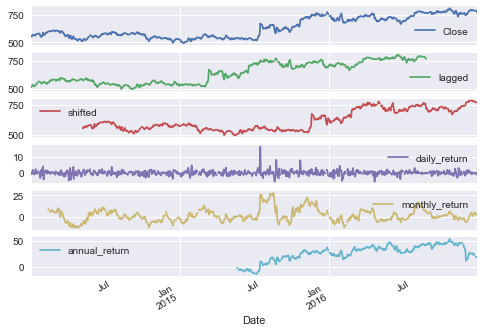

In [83]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()